# People Analytics - BRI Data Hackathon 2021 Competition [IKAI TECH]

## Import Package

In [1]:
import warnings
warnings.simplefilter(action='ignore')

# linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotbasic import categoric_all, categoric_one, categoric_plotpie, numeric_displot_all,numeric_displot_one,outlier_boxplot_all

# pipeline & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# correlation 
from jcopml.plot import plot_correlation_matrix, plot_association_matrix, plot_correlation_ratio

# model
from xgboost import XGBClassifier

# fine-tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from jcopml.tuning.space import Integer, Real
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

# report dan evaluasi
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value, plot_classification_report, plot_confusion_matrix,plot_roc_curve
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease
from sklearn.metrics import roc_auc_score

#shap interpretation model
import shap
shap.initjs() 

#load model
from jcopml.utils import load_model

# pandas display columns
pd.options.display.max_columns=100
pd.options.display.max_rows=1000

## Import Data

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


## Nomenklatur

In [3]:
df_des = pd.read_csv("../data/data_description.csv")
df_des.head()

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini


## Data Cleaning

### Duplicated

In [4]:
df.duplicated().sum()

0

### Missing Value

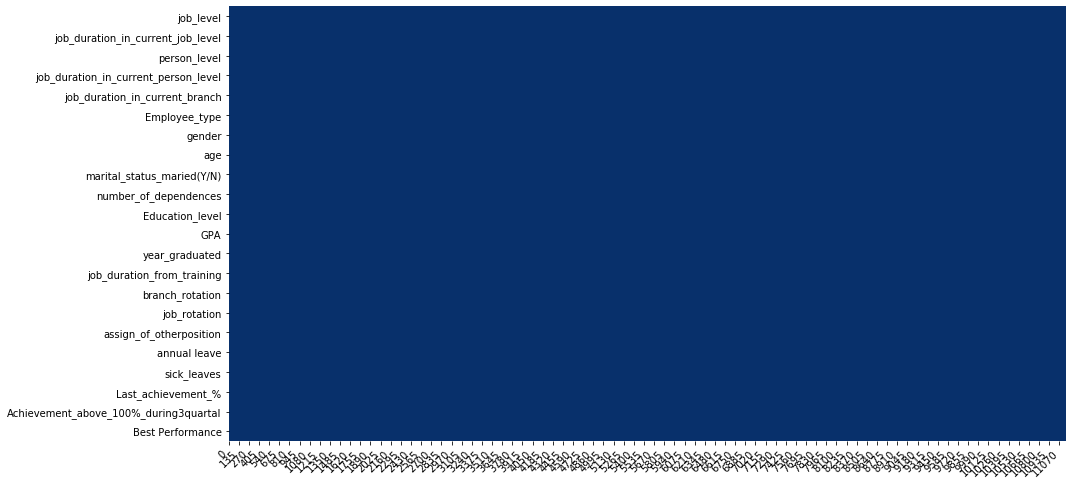

In [5]:
plot_missing_value(df)

### Handling Missing Value

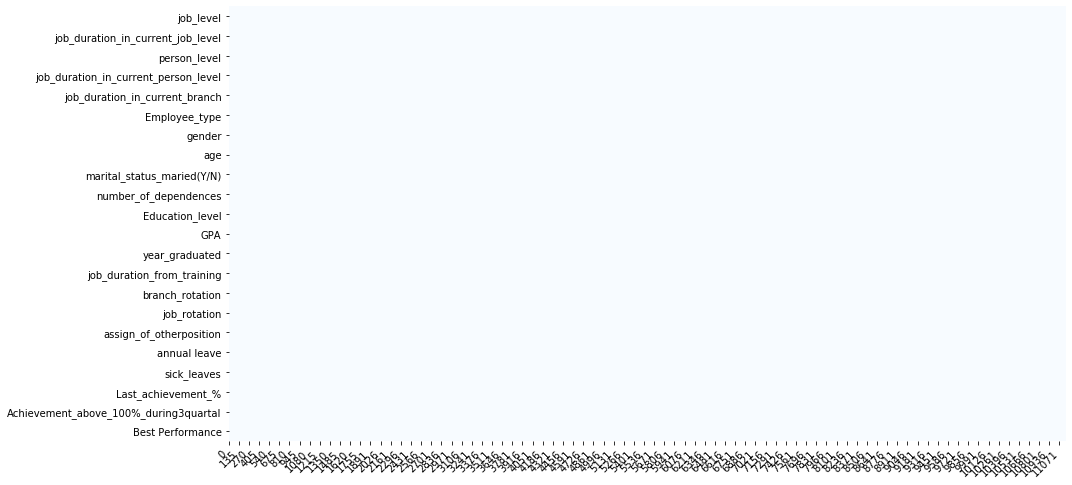

In [6]:
#hapus row NaN
df.dropna(inplace=True)

#setelah drop rows yang missing
plot_missing_value(df)

### Rename Columns

#### Gender

In [7]:
#Merubah Value Employee Type
df = df.copy()
df['gender'] = df['gender'].apply({
                        1 : 'Wanita',
                        2 : 'Pria'}.get)
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,Pria,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,Pria,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,Wanita,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,Pria,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,Pria,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


#### Educational Level

In [8]:
df['Education_level'].unique()

array(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5'],
      dtype=object)

In [9]:
#Merubah Value Educational Level
df = df.copy()
df['Education_level'] = df['Education_level'].apply({
                       'level_0': 'Internal course',
                       'level_1': 'SLTA',
                       'level_2': 'D1',
                       'level_3': 'D3/D4',
                       'level_4': 'S1',
                       'level_5': 'S2'}.get)
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,Pria,1985,Y,1,Internal course,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,Pria,1989,Y,0,SLTA,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,Wanita,1970,Y,1,SLTA,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,Pria,1967,Y,2,SLTA,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,Pria,1965,Y,3,SLTA,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


#### Employee Type

In [10]:
df.Employee_type.unique()

array(['RM_type_A', 'RM_type_C', 'RM_type_B'], dtype=object)

In [11]:
#Merubah Value Employee Type
df = df.copy()
df['Employee_type'] = df['Employee_type'].apply({
                       'RM_type_A': 'Mantri Kupedes',
                       'RM_type_B': 'Mantri KUR',
                       'RM_type_C': 'Mantri Briguna'}.get)
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,1985,Y,1,Internal course,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,1989,Y,0,SLTA,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,1970,Y,1,SLTA,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,1967,Y,2,SLTA,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,1965,Y,3,SLTA,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


## Eksploratory Data Analysis and Feature Engineering

### Balance (?)

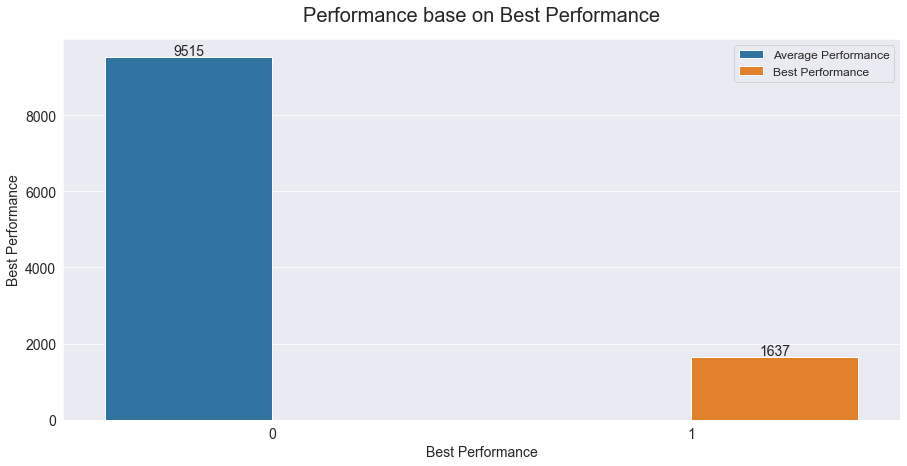

In [12]:
categoric_one(df, cols_name='Best Performance', target_name='Best Performance')

### Categorical

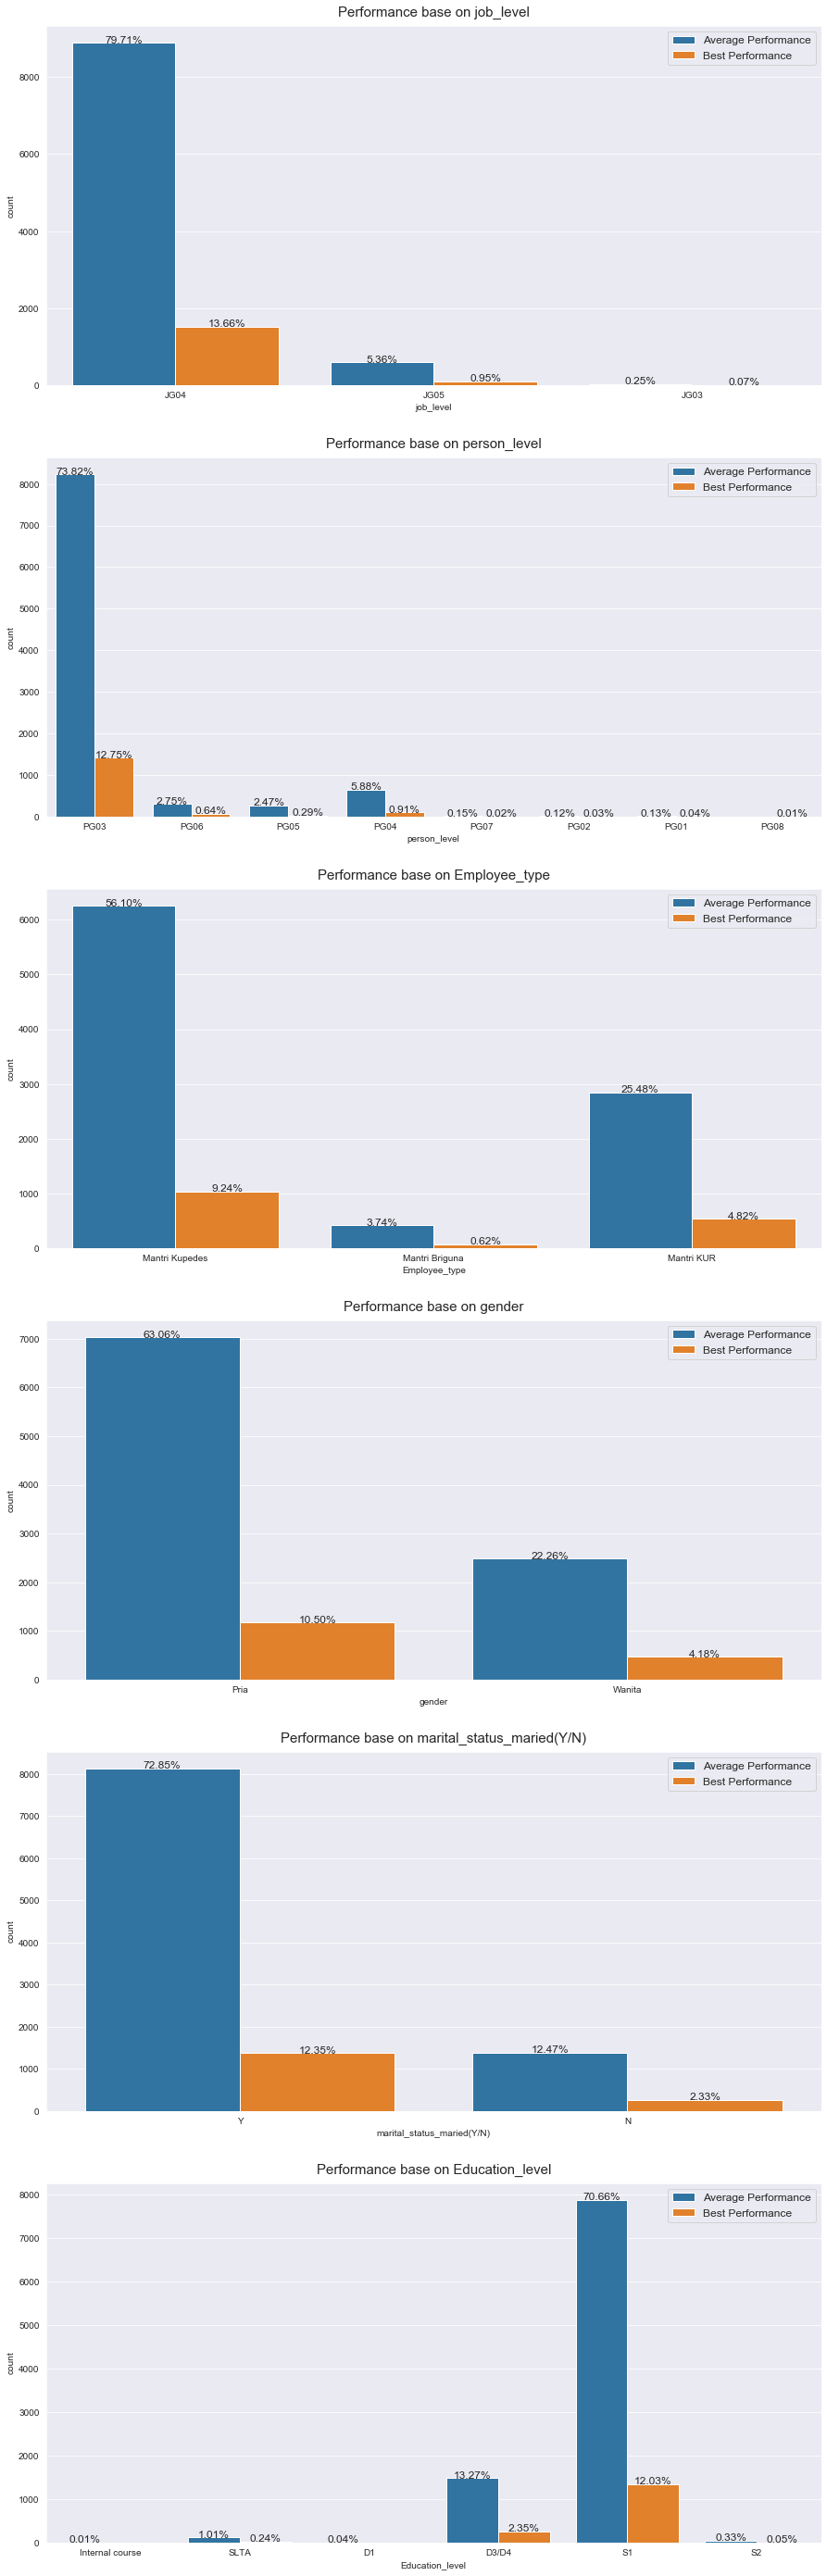

In [13]:
categoric_all(data=df, target_name='Best Performance')

<ul>Berdasarkan plot pada <b>performance based on Employee Type</b> tersebut, maka dapat disimpulkan bahwa:
    <li>tipe A, yaitu mantri kupedes memiliki jumlah pekerja yang paling banyak (dominan) sekitar 65.34%, diposisi ke-2 dan ke-3 yaitu tipe B dan C</li>
    <li>Berdasarkan data tersebut, pekerja dengan tipe A memiliki kinerja terbaik (best performance) terbanyak, sebesar 9,24% jika dibandingkan dgn 2 tipe pekerja lainnya</li>
    <li> Namun, tipe pekerja tidak signifikan mempengaruhi terhadap kinerja karyawan</li>
    </ul>

<ul>Berdasarkan plot pada <b>performance based on education level</b> tersebut, maka dapat disimpulkan bahwa:
    <li>Performance terbaik terdapat pada lulusan S1 dan pekerja tersebut, didominasi oleh lulusan S1</li>
    </ul>

<ul>Berdasarkan plot pada <b>performance based on Marital Status Maried</b> tersebut, maka dapat disimpulkan bahwa:
    <li>pekerja yang sudah menikah cenderung lebih produktif jika dibandingkan dengan pekerja yg belum menikah dgn tingkat perbandingan yang tidak terlalu signifikan</li>
</ul>

<ul>Berdasarkan plot pada <b>performance based on person level</b> tersebut, maka dapat disimpulkan bahwa:
    <li>Performance terbaik (best performance terbanyak) terdapat pada level (PG03), dan pada level 3 mempunyai banyak pekerja. Namun, jika dilihat total keseluruhan yg berada pada level PG03 itu semua tdk signifikan mempengaruhi apakah pekerja tersebut best performance atau tdk </li>
    </ul>

<ul>Berdasarkan plot pada <b>performance based on job level</b> tersebut, maka dapat disimpulkan bahwa:
    <li>Performance terbaik terdapat pada (JG04), dan pada level ini juga mempunyai banyak pekerja. Namun, jika dilihat total keseluruhan yg berada pada level JG04 itu semua tdk signifikan mempengaruhi apakah pekerja tersebut best performance atau tdk. karena cenderung tdk best performance  </li>
    </ul>

#### Correlation Categorical Data

In [14]:
cat_var = [i for i in df.select_dtypes(include='object')]
plot_association_matrix(df, target_col='Best Performance', categoric_col=cat_var)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

### Numeric

#### Correlation Numerical Data

In [15]:
num_var = [i for i in df.select_dtypes(exclude='object')]
plot_correlation_matrix(df=df, target_col='Best Performance', numeric_col=num_var)

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

#### Is there any extreme data or outliers among all numerical variables?

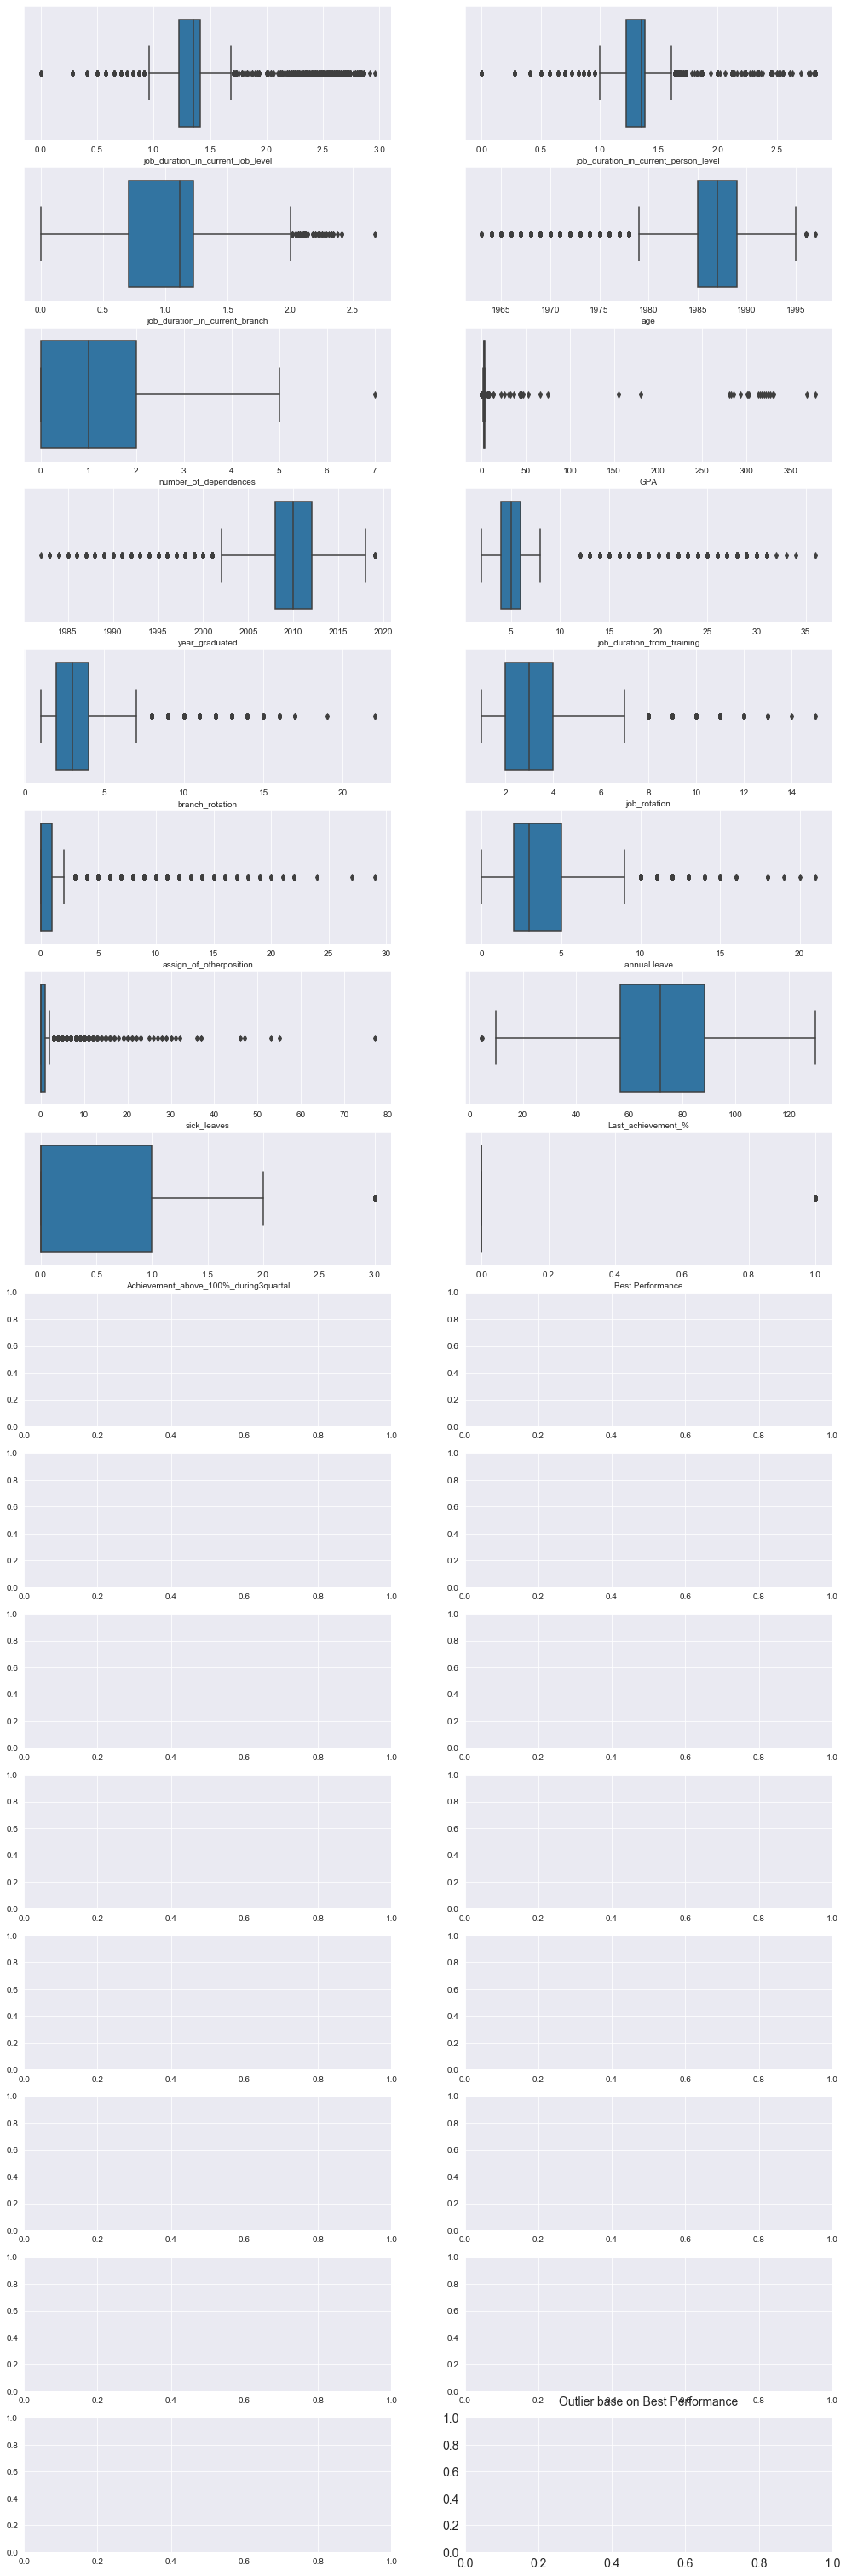

In [16]:
outlier_boxplot_all(data=df)

#### Handling Outlier

##### GPA

``IQR`` : <b> Q3-Q1 </b> <br>
``Batas Bawah : `` <b>Q1-1.5(IQR)</b><br>
``Batas Atas  : `` <b>Q3+1.5(IQR)</b><br>
``IQR`` >> Interval Quantile Range

In [17]:
IQR = (df['GPA'].describe()['75%'] ) - (df['GPA'].describe()['25%'])
batas_bawah = (df['GPA'].describe()['25%']) - (1.5 * IQR)
batas_atas  = (df['GPA'].describe()['75%']) + (1.5 * IQR)

print(batas_bawah, batas_atas)

2.1449999999999996 3.9450000000000003


In [18]:
#IPK > batas atas
df=df.copy()
df.loc[df['GPA'] > batas_atas, 'GPA'] = batas_atas

In [19]:
#IPK < batas bawah
df=df.copy()
df.loc[df['GPA'] < batas_bawah, 'GPA'] = batas_bawah

In [20]:
df['GPA'].describe()

count    11152.000000
mean         2.968877
std          0.460360
min          2.145000
25%          2.820000
50%          3.070000
75%          3.270000
max          3.945000
Name: GPA, dtype: float64

#### Feature Engineering v1

##### Year Graduate

In [21]:
df['year_graduated'].unique()

array([2011, 2007, 1989, 1987, 1985, 1990, 1988, 2009, 1999, 1992, 2008,
       2012, 2013, 1983, 1986, 2004, 2015, 1995, 1996, 1993, 2006, 2016,
       2005, 1994, 1984, 1982, 1998, 1991, 2010, 2000, 2014, 2003, 2018,
       2001, 2002, 2017, 1997, 2019], dtype=int64)

In [22]:
#Merubah year_graduated menjadi jumlah waktu lama sudah lulus
df = df.copy()
df['year_graduated'] = 2020 - df['year_graduated']
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,1985,Y,1,Internal course,2.860,9,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,1989,Y,0,SLTA,3.945,13,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,1970,Y,1,SLTA,2.145,31,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,1967,Y,2,SLTA,2.145,33,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,1965,Y,3,SLTA,3.945,35,30,9,8,2,3,0,47.18,0.0,0


##### Age

In [23]:
df['age'].unique()

array([1985, 1989, 1970, 1967, 1965, 1971, 1969, 1968, 1991, 1966, 1993,
       1980, 1974, 1988, 1990, 1994, 1964, 1996, 1986, 1977, 1976, 1975,
       1995, 1963, 1992, 1981, 1987, 1973, 1979, 1978, 1972, 1984, 1983,
       1982, 1997], dtype=int64)

In [24]:
#Merubah tahun lahir menjadi usia
df = df.copy()
df['age'] = 2020 - df['age']
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,9,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,13,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,31,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,33,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,35,30,9,8,2,3,0,47.18,0.0,0


#### Displot Distribution Data

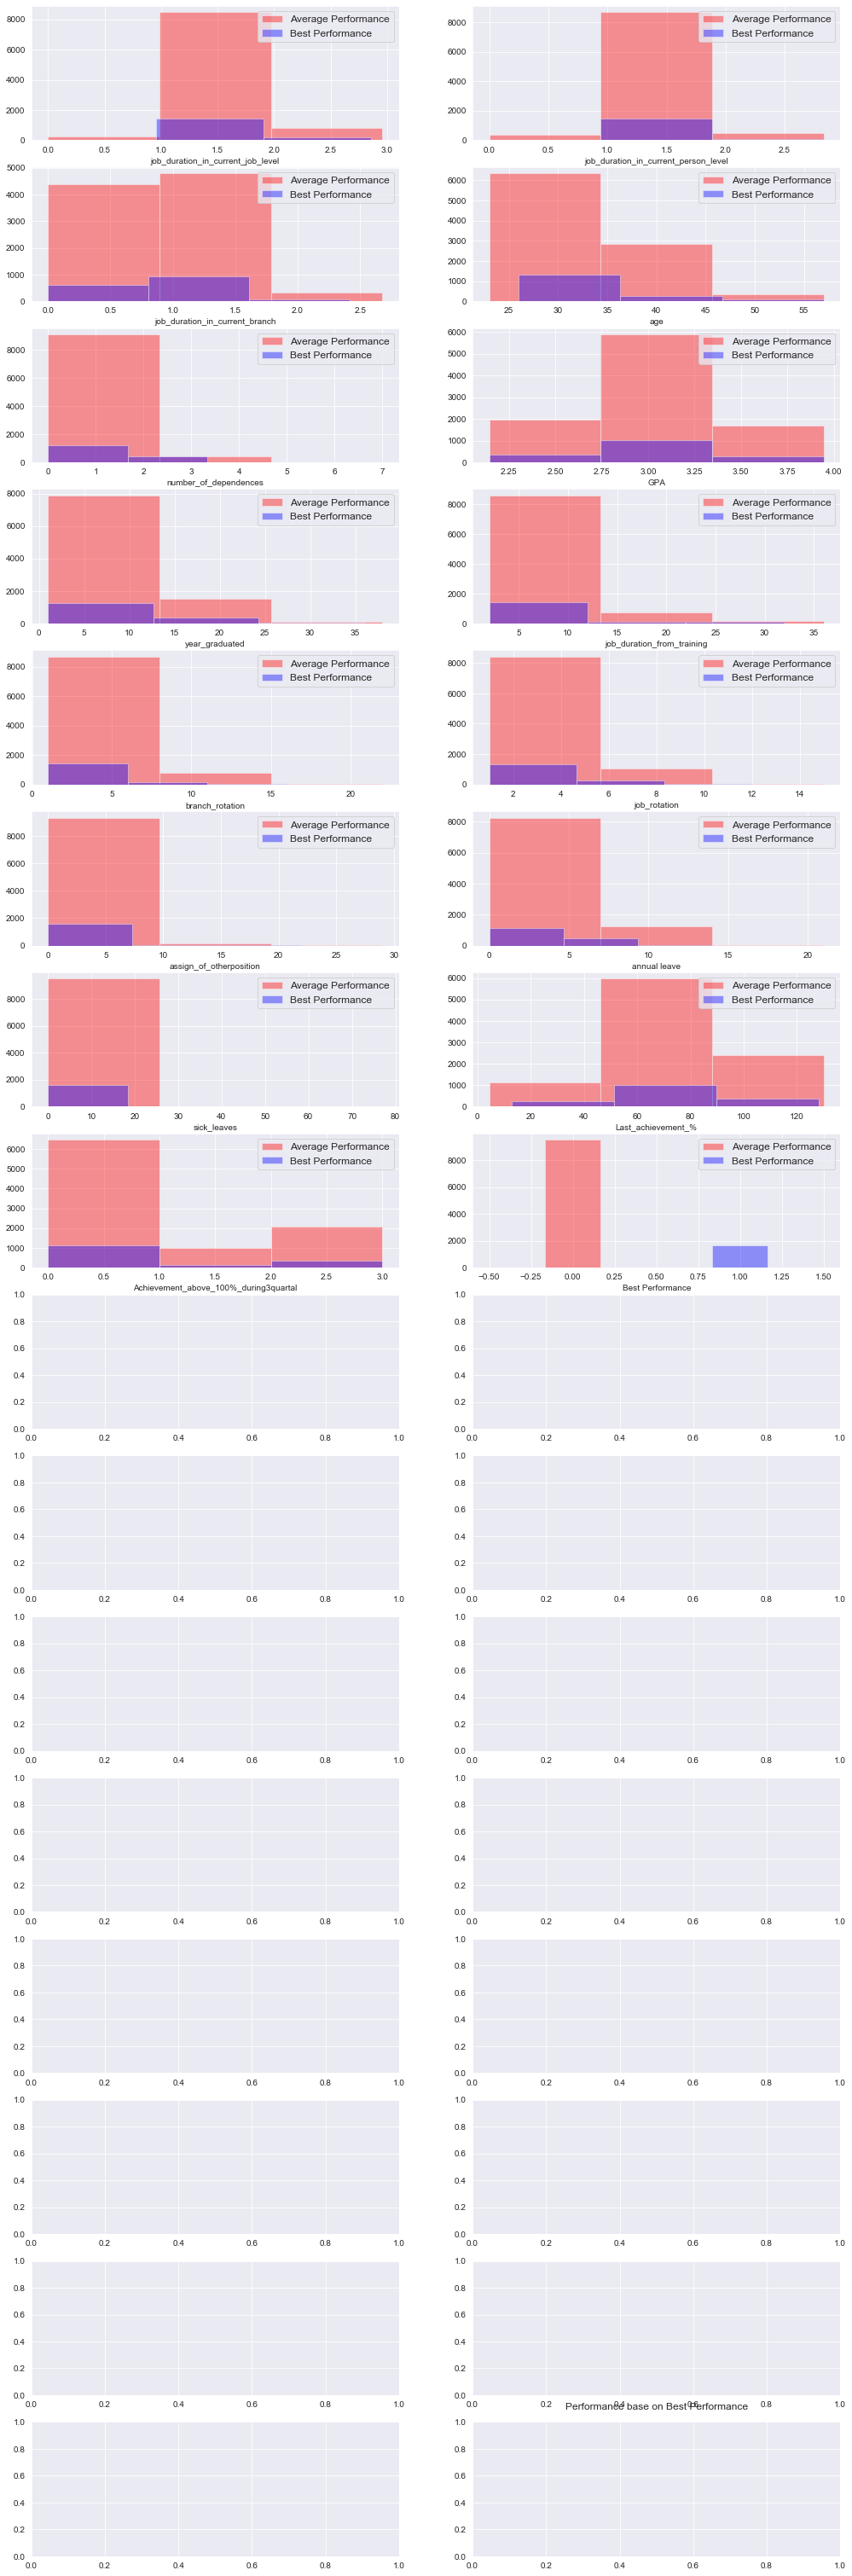

In [25]:
numeric_displot_all(df, target_name='Best Performance', bins=3, label1='Average Performance', label2='Best Performance')

#### Feature Engineering v2

##### Binning year Graduate

In [26]:
df = df.copy()
df['year_graduated'] = pd.cut(df['year_graduated'], [df['year_graduated'].min()-1, 5, 18, df['year_graduated'].max()], labels=["Fresh Graduate", "Cukup Lama", "Sangat Lama"])
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,3,0,47.18,0.0,0


##### Binning Sick Leaves

In [27]:
df['sick_leaves'].describe()

count    11152.000000
mean         1.098906
std          2.711453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         77.000000
Name: sick_leaves, dtype: float64

In [28]:
df = df.copy()
df['sick_leaves'] = pd.cut(df['sick_leaves'], [df['sick_leaves'].min()-1, 5, 10, df['sick_leaves'].max()], labels=["Sedikit", "Cukup", "Sering"])
df.head(5)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,3,Sedikit,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,0,Sedikit,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,2,Sedikit,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,4,Cukup,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,3,Sedikit,47.18,0.0,0


##### Binning annual leave

In [29]:
df = df.copy()
df['annual leave'] = pd.cut(df['annual leave'], [df['annual leave'].min()-1, 5, 10, df['annual leave'].max()], labels=["Sedikit", "Cukup", "Sering"])
df.head(5)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,Sedikit,Sedikit,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,Sedikit,Sedikit,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,Sedikit,Sedikit,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,Sedikit,Cukup,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,Sedikit,Sedikit,47.18,0.0,0


##### Kolom Baru >> Rate_Last_achievement_%

In [30]:
#scaling -> melakukan scaling menjadi 0-1 pada kolom last_achievement
df_ = df.copy()
df['Rate_Last_achievement_%'] = df['Last_achievement_%'].transform(lambda x: (x-x.min())/((x.max()-x.min())))
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Rate_Last_achievement_%
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,Sedikit,Sedikit,46.37,0.0,0,0.333572
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,Sedikit,Sedikit,47.68,0.0,0,0.344011
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,Sedikit,Sedikit,40.73,0.0,0,0.288629
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,Sedikit,Cukup,47.42,0.0,1,0.341940
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,Sedikit,Sedikit,47.18,0.0,0,0.340027


##### Binning GPA dan kolom baru

In [31]:
df = df.copy()
df['GPA_predikat'] = pd.cut(df['GPA'], [df['GPA'].describe()['min']-1, df['GPA'].describe()['25%'], df['GPA'].describe()['50%'], df['GPA'].describe()['75%'],df['GPA'].max()], labels=["Kurang Memuaskan", "Memuaskan", "Sangat Memuaskan","Dengan Pujian"])
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Rate_Last_achievement_%,GPA_predikat
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,Pria,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,Sedikit,Sedikit,46.37,0.0,0,0.333572,Memuaskan
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,Pria,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,Sedikit,Sedikit,47.68,0.0,0,0.344011,Dengan Pujian
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,Wanita,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,Sedikit,Sedikit,40.73,0.0,0,0.288629,Kurang Memuaskan
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,Pria,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,Sedikit,Cukup,47.42,0.0,1,0.341940,Kurang Memuaskan
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,Pria,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,Sedikit,Sedikit,47.18,0.0,0,0.340027,Dengan Pujian


In [32]:
#Merubah Value Employee Type
df = df.copy()
df['gender'] = df['gender'].apply({
                        'Wanita' : 1,
                        'Pria'   : 2}.get)
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,Rate_Last_achievement_%,GPA_predikat
0,JG04,1.352775,PG03,1.352775,1.732051,Mantri Kupedes,2,35,Y,1,Internal course,2.860,Cukup Lama,4,2,3,2,Sedikit,Sedikit,46.37,0.0,0,0.333572,Memuaskan
1,JG04,1.292285,PG03,1.292285,1.039230,Mantri Kupedes,2,31,Y,0,SLTA,3.945,Cukup Lama,4,4,3,0,Sedikit,Sedikit,47.68,0.0,0,0.344011,Dengan Pujian
2,JG05,2.565151,PG06,2.308679,1.780449,Mantri Briguna,1,50,Y,1,SLTA,2.145,Sangat Lama,28,10,9,6,Sedikit,Sedikit,40.73,0.0,0,0.288629,Kurang Memuaskan
3,JG05,2.828427,PG06,1.000000,1.385641,Mantri Kupedes,2,53,Y,2,SLTA,2.145,Sangat Lama,29,11,6,0,Sedikit,Cukup,47.42,0.0,1,0.341940,Kurang Memuaskan
4,JG05,2.828427,PG06,2.828427,0.707107,Mantri Kupedes,2,55,Y,3,SLTA,3.945,Sangat Lama,30,9,8,2,Sedikit,Sedikit,47.18,0.0,0,0.340027,Dengan Pujian


## Dataset Splitting 

### Standard Splitting

In [33]:
X = df.drop(columns="Best Performance")
y = df['Best Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8921, 23), (2231, 23), (8921,), (2231,))

### Encode Categorical

In [34]:
from sklearn.preprocessing import LabelEncoder
cat_columns = ['job_level','person_level','Employee_type','marital_status_maried(Y/N)',
               'Education_level','annual leave','sick_leaves','GPA_predikat','year_graduated']
for cat in cat_columns:
    labelencoder = LabelEncoder()
    X_train[cat] = labelencoder.fit_transform(X_train[cat].astype(str))
    X_test[cat] = labelencoder.transform(X_test[cat].astype(str))    

X_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Rate_Last_achievement_%,GPA_predikat
6070,1,2.707397,3,1.870829,1.191638,0,1,36,0,0,3,2.860,0,7,4,2,2,1,1,61.49,0.0,0.454060,2
7540,1,1.224745,2,1.224745,1.224745,2,2,39,1,2,3,2.145,0,6,4,2,0,1,1,64.09,0.0,0.474779,1
172,1,1.118034,2,1.118034,1.442221,2,2,31,1,1,1,2.920,0,4,2,3,0,1,1,42.71,0.0,0.304407,2
9514,2,0.911043,4,0.911043,1.224745,2,2,40,1,2,3,3.400,0,14,8,5,0,1,1,99.37,3.0,0.755917,0
7948,1,1.322876,2,1.322876,0.000000,2,2,32,1,0,3,3.300,0,4,3,2,4,0,1,46.31,0.0,0.333094,0


## Training

### XGBoost

In [69]:
# preprocessing
preprocessor = ColumnTransformer([
('numeric', num_pipe(transform='yeo-johnson'), ['job_duration_in_current_job_level','job_duration_in_current_person_level',
                         'job_duration_in_current_branch','age','number_of_dependences','GPA',
                         'job_duration_from_training','branch_rotation','job_rotation',
                         'assign_of_otherposition','Last_achievement_%',
                         'Achievement_above_100%_during3quartal','Rate_Last_achievement_%']),
                                  
('categoric', cat_pipe(), ['job_level','person_level','Employee_type','gender', 
                           'marital_status_maried(Y/N)','Education_level',
                           'annual leave','sick_leaves','GPA_predikat','year_graduated']),

])

#pipeline
xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(random_state=42, 
                           colsample_bytree=0.4716632329949405, 
                           gamma=9,
                           learning_rate=0.01565044256508018, 
                           max_depth=10,
                           n_estimators=115,
                           reg_alpha=4.140620099268037,
                           reg_lambda=0.16998787839972815,
                           scale_pos_weight=5.830168585219598,
                           subsample=0.4894710466979076))
])

#model_fit
xgb.fit(X_train, y_train)

#testing
y_pred = xgb.predict_proba(X_test)[:,1]

#report
xgb_without_tune_test = roc_auc_score(y_test, y_pred)
print('ROC-AUC : ', xgb_without_tune_test)

#save model
save_model(xgb, "xgb_9.pkl")

ROC-AUC :  0.567573818518233
Model is pickled as model/xgb_9.pkl


## Submission

###  Import Data Testing

In [36]:
test = pd.read_csv('../data/test.csv')
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0


### year graduate

In [37]:
#Merubah year_graduated menjadi jumlah waktu lama sudah lulus
test = test.copy()
test['year_graduated'] = 2020 - test['year_graduated']
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,11,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,6,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,9,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,6,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,13,5,3,2,0,3,0,82.32,0.0


### Binning year Graduate

In [38]:
test = test.copy()
test['year_graduated'] = pd.cut(test['year_graduated'], [-1, 5, 18, 35], labels=["Fresh Graduate", "Cukup Lama", "Sangat Lama"])
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,Cukup Lama,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,Cukup Lama,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,Cukup Lama,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,Cukup Lama,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,Cukup Lama,5,3,2,0,3,0,82.32,0.0


### Binning dan Kolom Baru GPA

In [39]:
test = test.copy()
test['GPA_predikat'] = pd.cut(test['GPA'], [-1,  2.8, 3.0, 3.27, 4.0], labels=["Kurang Memuaskan", "Memuaskan", "Sangat Memuaskan","Dengan Pujian"])
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,Cukup Lama,6,4,2,6,3,7,84.02,0.0,Sangat Memuaskan
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,Cukup Lama,2,2,2,0,1,0,63.74,0.0,Dengan Pujian
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,Cukup Lama,4,2,2,0,2,1,88.19,1.0,Dengan Pujian
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,Cukup Lama,3,1,3,0,3,0,25.94,0.0,Kurang Memuaskan
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,Cukup Lama,5,3,2,0,3,0,82.32,0.0,Dengan Pujian


### Binning annual leave

In [40]:
test = test.copy()
test['annual leave'] = pd.cut(test['annual leave'], [-1, 5, 10, 20], labels=["Sedikit", "Cukup", "Sering"])
test.head(5)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,Cukup Lama,6,4,2,6,Sedikit,7,84.02,0.0,Sangat Memuaskan
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,Cukup Lama,2,2,2,0,Sedikit,0,63.74,0.0,Dengan Pujian
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,Cukup Lama,4,2,2,0,Sedikit,1,88.19,1.0,Dengan Pujian
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,Cukup Lama,3,1,3,0,Sedikit,0,25.94,0.0,Kurang Memuaskan
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,Cukup Lama,5,3,2,0,Sedikit,0,82.32,0.0,Dengan Pujian


### Binning Sick Leaves

In [41]:
test = test.copy()
test['sick_leaves'] = pd.cut(test['sick_leaves'], [-1, 5, 10, 20], labels=["Sedikit", "Cukup", "Sering"])
test.head(5)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,Cukup Lama,6,4,2,6,Sedikit,Cukup,84.02,0.0,Sangat Memuaskan
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,Cukup Lama,2,2,2,0,Sedikit,Sedikit,63.74,0.0,Dengan Pujian
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,Cukup Lama,4,2,2,0,Sedikit,Sedikit,88.19,1.0,Dengan Pujian
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,Cukup Lama,3,1,3,0,Sedikit,Sedikit,25.94,0.0,Kurang Memuaskan
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,Cukup Lama,5,3,2,0,Sedikit,Sedikit,82.32,0.0,Dengan Pujian


### Age

In [42]:
#Merubah tahun lahir menjadi usia
test = test.copy()
test['age'] = 2020 -test['age']
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,32,N,0,level_3,3.08,Cukup Lama,6,4,2,6,Sedikit,Cukup,84.02,0.0,Sangat Memuaskan
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,29,N,0,level_4,3.31,Cukup Lama,2,2,2,0,Sedikit,Sedikit,63.74,0.0,Dengan Pujian
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,31,Y,1,level_4,3.44,Cukup Lama,4,2,2,0,Sedikit,Sedikit,88.19,1.0,Dengan Pujian
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,30,Y,1,level_4,0.00,Cukup Lama,3,1,3,0,Sedikit,Sedikit,25.94,0.0,Kurang Memuaskan
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,35,Y,0,level_4,3.34,Cukup Lama,5,3,2,0,Sedikit,Sedikit,82.32,0.0,Dengan Pujian


### GPA

In [43]:
test=test.copy()
test.loc[test['GPA'] > 4, 'GPA'] = batas_atas

In [44]:
test=test.copy()
test.loc[test['GPA'] < 2, 'GPA'] = batas_bawah

In [45]:
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,32,N,0,level_3,3.080,Cukup Lama,6,4,2,6,Sedikit,Cukup,84.02,0.0,Sangat Memuaskan
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,29,N,0,level_4,3.310,Cukup Lama,2,2,2,0,Sedikit,Sedikit,63.74,0.0,Dengan Pujian
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,31,Y,1,level_4,3.440,Cukup Lama,4,2,2,0,Sedikit,Sedikit,88.19,1.0,Dengan Pujian
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,30,Y,1,level_4,2.145,Cukup Lama,3,1,3,0,Sedikit,Sedikit,25.94,0.0,Kurang Memuaskan
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,35,Y,0,level_4,3.340,Cukup Lama,5,3,2,0,Sedikit,Sedikit,82.32,0.0,Dengan Pujian


### Last_Acievement_100%

In [46]:
#scaling -> melakukan scaling menjadi 0-1 pada kolom last_achievement
test = test.copy()
test['Rate_Last_achievement_%'] = test['Last_achievement_%'].transform(lambda x: (x-x.min())/((x.max()-x.min())))
test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat,Rate_Last_achievement_%
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,32,N,0,level_3,3.080,Cukup Lama,6,4,2,6,Sedikit,Cukup,84.02,0.0,Sangat Memuaskan,0.614747
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,29,N,0,level_4,3.310,Cukup Lama,2,2,2,0,Sedikit,Sedikit,63.74,0.0,Dengan Pujian,0.444826
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,31,Y,1,level_4,3.440,Cukup Lama,4,2,2,0,Sedikit,Sedikit,88.19,1.0,Dengan Pujian,0.649686
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,30,Y,1,level_4,2.145,Cukup Lama,3,1,3,0,Sedikit,Sedikit,25.94,0.0,Kurang Memuaskan,0.128111
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,35,Y,0,level_4,3.340,Cukup Lama,5,3,2,0,Sedikit,Sedikit,82.32,0.0,Dengan Pujian,0.600503


### Encode

In [47]:
cat_columns = ['job_level','person_level','Employee_type','marital_status_maried(Y/N)',
               'Education_level','annual leave','sick_leaves','GPA_predikat','year_graduated']
for cat in cat_columns:
    labelencoder = LabelEncoder()
    test[cat] = labelencoder.fit_transform(test[cat].astype(str))

test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,GPA_predikat,Rate_Last_achievement_%
0,1,1.256981,2,1.256981,0.707107,0,1,32,0,0,3,3.080,0,6,4,2,6,1,0,84.02,0.0,3,0.614747
1,1,1.224745,2,1.224745,1.256981,1,2,29,0,0,4,3.310,0,2,2,2,0,1,1,63.74,0.0,0,0.444826
2,1,0.500000,2,0.500000,1.081665,0,2,31,1,1,4,3.440,0,4,2,2,0,1,1,88.19,1.0,0,0.649686
3,1,1.256981,2,1.256981,1.802776,0,2,30,1,1,4,2.145,0,3,1,3,0,1,1,25.94,0.0,1,0.128111
4,1,1.352775,2,1.352775,1.224745,1,1,35,1,0,4,3.340,0,5,3,2,0,1,1,82.32,0.0,0,0.600503


## Submit

In [63]:
def submit(model, filename="../hasil/IK___XGBv9.csv"):
    df_submit = test
    df_submit["Best Performance"] = xgb.predict_proba(df_submit)[:,1]
    #df_submit["Best Performance"] = xgb.predict(df_submit)
    df_submit[["Best Performance"]].to_csv(filename, index_label='index')

#predict    
submit(xgb, filename="../hasil/IK___XGBv9.csv")

## Interpretation Model Using Shap

### Explainer Shap

In [ ]:
# explainer = shap.TreeExplainer(xgb.named_steps["algo"])
# observations = xgb.named_steps["prep"].transform(X_train.sample(6000, random_state=42))
# shap_values = explainer.shap_values(observations)

In [65]:
explainer = shap.TreeExplainer(xgb.named_steps["algo"])
shap_values = explainer.shap_values(X_train.sample(6000, random_state=42))

### Single Prediction

job_level                                 1.000000
job_duration_in_current_job_level         1.292285
person_level                              2.000000
job_duration_in_current_person_level      1.292285
job_duration_in_current_branch            1.414214
Employee_type                             0.000000
gender                                    2.000000
age                                      32.000000
marital_status_maried(Y/N)                0.000000
number_of_dependences                     0.000000
Education_level                           4.000000
GPA                                       3.340000
year_graduated                            0.000000
job_duration_from_training                3.000000
branch_rotation                           3.000000
job_rotation                              3.000000
assign_of_otherposition                   0.000000
annual leave                              1.000000
sick_leaves                               1.000000
Last_achievement_%             

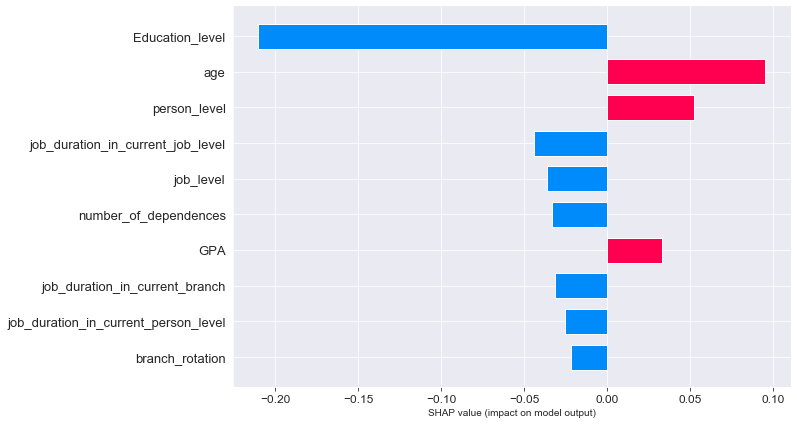

In [72]:
i = np.random.randint(0, 5999)
observation = test.iloc[[i], :]

print(test.iloc[i])
print("\nData test ke-",i)
print("Label/Probability Prediksi 0:",xgb.predict_proba(observation)[:,0].item())
print("Label/Probability Prediksi 1:",xgb.predict_proba(observation)[:,1].item())
# print("Label asli     : ",y_test.iloc[i])

#plot
plt.figure(figsize=(10,7), facecolor='w')
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

#barplot
shap.bar_plot(shap_values=shap_values[i], feature_names=X_train.columns, max_display=10, show=False)

#forceplot
shap.force_plot(explainer.expected_value, shap_values[i], feature_names=X_train.columns, link='logit')

### Feature Importance

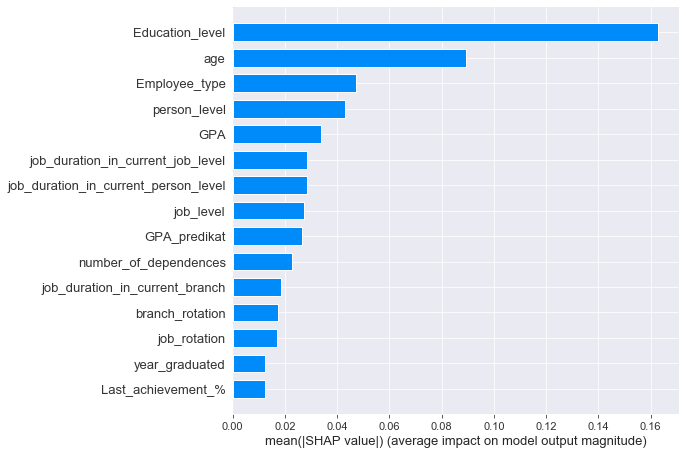

In [71]:
plt.figure(figsize=(15,7), facecolor='w')
shap.summary_plot(shap_values, shap_values, plot_type="bar",feature_names=X_train.columns, max_display=15, show=False)